In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/oc-projet6/flipkart_com-ecommerce_sample_1050.csv
/kaggle/input/projet-6-ocds/p6-01-notebook.ipynb
/kaggle/input/projet-6-ocds/nlp-101-with-nltk-and-spacy-text-analysis.ipynb
/kaggle/input/projet-6-ocds/01_text_processing.ipynb
/kaggle/input/projet-6-ocds/flipkart_com-ecommerce_sample_1050.csv
/kaggle/input/projet-6-ocds/Exemple_Tweets_Feature-extraction_SentenceEmbedding_V1.1.ipynb
/kaggle/input/projet-6-ocds/nlp-for-beginners.ipynb
/kaggle/input/projet-6-ocds/Weather_Images_CNN_Transfer_Learning_Stage_1_feasibility_V1.0.ipynb
/kaggle/input/projet-6-ocds/nlp-preprocessing-feature-extraction-methods-a-z.ipynb
/kaggle/input/projet-6-ocds/OC DS Projet 6 notebook 1.ipynb
/kaggle/input/projet-6-ocds/P6_01.ipynb
/kaggle/input/projet-6-ocds/Weather_first_analysis_V1.0.ipynb
/kaggle/input/projet-6-ocds/Functions.py
/kaggle/input/projet-6-ocds/Place_marche.PNG


In [2]:
%%time
# Built-in
import os, warnings 
from tqdm import tqdm


# Data
import numpy as np
import pandas as pd

#Visualisation
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import missingno as msno
import seaborn as sns
from wordcloud import WordCloud
from PIL import Image
import plotly.express as px

# NLP
import nltk #/!\ attention use nltk.download('punkt')
from nltk.stem.snowball import EnglishStemmer
from nltk.stem import WordNetLemmatizer, PorterStemmer
from nltk.tokenize import word_tokenize, wordpunct_tokenize, RegexpTokenizer
from nltk.corpus import words, stopwords

# Cluster
from sklearn.cluster import KMeans,MiniBatchKMeans, DBSCAN

#metrics
from sklearn.metrics import (silhouette_samples,silhouette_score, adjusted_rand_score,
                             adjusted_mutual_info_score,confusion_matrix, pair_confusion_matrix,
                            ConfusionMatrixDisplay)

# date
from datetime import date, time, datetime, timedelta
from dateutil.relativedelta import relativedelta

# Chemin
imgPath='C:/Users/Fane0763/OpenClassroom/OC Projet 6/Graphs/'

# Nombre aléatoire pour la reproductibilité des résultats
random_state = 42

# Affichage des valeurs
# pd.set_option('display.max_colwidth', None)

# Police et reglages
font_title = {'family': 'serif', 'color':  '#114b98', 'weight': 'bold', 'size': 16,}
font_title2 = {'family': 'serif', 'color':  '#114b98', 'weight': 'bold', 'size': 12,}
font_title3 = {'family': 'serif', 'color':  '#4F6272', 'weight': 'bold', 'size': 10,}

mycolors = ["black", "hotpink", "b", "#4CAF50"]
AllColors=['#99ff99','#66b3ff','#4F6272', '#B7C3F3','#ff9999','#ffcc99','#ff6666', '#DD7596', '#8EB897',
           '#c2c2f0','#DDA0DD','#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', 
           '#7f7f7f', '#bcbd22', '#17becf','#e41a1c','#377eb8','#4daf4a','#984ea3','#ff7f00','#ffff33',
           '#a65628','#f781bf',"#E69F00", "#56B4E9", "#009E73", "#F0E442", "#0072B2", "#D55E00", "#CC79A7", "#000000"]

%matplotlib inline

CPU times: user 1.98 s, sys: 531 ms, total: 2.51 s
Wall time: 3.44 s


In [3]:
def namestr(obj, namespace):
    ''' fonction retourne le nom en string '''
    return [name for name in namespace if namespace[name] is obj] 

def Camembert(data,col):
    df = data[col].value_counts().reset_index()
    L=len(df[col])
    labels=list(df['index'])
    sizes=list(df[col])
    # print(labels,"\n",sizes)
    explode = Explodetuple(L)
    colors =AllColors[:L] 
    fig1, ax1 = plt.subplots(figsize=(7, 5))
    ax1.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%',shadow=True, startangle=0) 
    # Equal aspect ratio ensures that pie is drawn as a circle
    ax1.axis('equal')
    plt.tight_layout()
    plt.show()
    
def remplacement(data, cols, caracter1,caracter2):
    for col in cols:
        data[col] = data[col].str.lower().str.replace(caracter1, caracter2)
    return data

def remplacement2(data, cols, caracter1,caracter2):
    for col in cols:
        data[col] = data[col].str.replace(caracter1, caracter2)
    return data

def recodage(data, cols):
    for col in cols:
        data[col] = np.where((data[col].isnull()==True), "unknown", np.where(data[col] == "", "unknown", data[col]))
    return data

# Cette fonction permet de lister les modalités avec leur occurence d'unchamp qui cumule differentes modalités.
def top_words(data, cols, nb_top=100):
    count_keyword = dict()
    for index, col in data[cols].iteritems():
        if isinstance(col, float):
            continue
        for word in col.split(','):
            if word in count_keyword.keys():
                count_keyword[word] += 1
            else :
                count_keyword[word] = 1
  
    keyword_top = []
    for k,v in count_keyword.items():
        keyword_top.append([k,v])
    keyword_top.sort(key = lambda x:x[1], reverse = True)
    return keyword_top[:nb_top]


def Explodetuple(m):
    liste1=[]
    for t in range(m):
        if t in [0,1] :
            liste1.append(0.1)
        else:
            liste1.append(0)
    return tuple(liste1) 

def percentFreq(values):
    def my_format(pct):
        total = sum(values)
        val = int(round(pct*total/100.0))
        # return '{:.1f}%\n({v:d})'.format(pct, v=val)
        return '{:.1f}%({v:d})'.format(pct, v=val)
    return my_format
    

def repartitionTypeVar(data,figsize=(6, 3),title="Repartition par types de variables"):
    df = data.dtypes.value_counts()
    L=len(df)
    labels=list(df.index)
    sizes=list(df)
    # print(labels,"\n",sizes)
    explode = Explodetuple(L)
    colors =AllColors[:L] 
    fig1, ax1 = plt.subplots(figsize=figsize)
    ax1.pie(sizes, explode=explode, labels=labels, colors=colors, autopct=percentFreq(df),shadow=True, startangle=0) 
    # Equal aspect ratio ensures that pie is drawn as a circle
    ax1.axis('equal')
    plt.tight_layout()
    plt.title(label=title,fontdict=font_title)
    plt.legend()
    plt.show()
    df=df.reset_index()
    df.columns=['Types de variables','Nombre']
    display(df.reset_index(drop=True))

def fillingRate(data, grahName=''):   
    filled =data.notna().sum().sum()/(data.shape[0]*data.shape[1])
    missing =data.isna().sum().sum()/(data.shape[0]*data.shape[1])

    taux = [filled, missing]
    labels = ["%filled", "%missing"]
    
    fig, ax = plt.subplots(figsize=(5, 5))
    plt.title("Taux de completion \n", fontdict=font_title)
    ax.axis("equal")
    explode = (0.1, 0)
    ax.pie(taux, explode=explode, labels=labels, autopct='%1.2f%%', shadow=True,)
    plt.legend(labels)
    if grahName!='':
        plt.savefig(imgPath+grahName, bbox_inches='tight')  
        plt.show() 
    plt.close()
    
import pandas as pd
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

def nuageMots(data, col,figsize=(16,12),color="white",graphName=''):
    display(Markdown('------------------------------------'))       
    display(Markdown('#### Nuage de mots sur : {0}'.format(col)))
    display(Markdown('------------------------------------'))
    fig = plt.figure(1, figsize=figsize)
    ax1 = fig.add_subplot(1,1,1)
    #Creation de la variable text
    df=data.loc[data[col].notnull(),:]
    text = ' '.join(cat for cat in df[col])
    # Carte avec les mots: background_color="salmon"
    word_cloud = WordCloud(width=2000,height=1000,normalize_plurals=False,random_state=1,# colormap="Pastel1", 
                           collocations=False,stopwords=STOPWORDS, background_color=color, ).generate(text)
    ax1.imshow(word_cloud, interpolation="bilinear")
    # Afficher le nuage
    plt.imshow(word_cloud)
    plt.axis("off")
    if graphName!='':
        plt.savefig(imgPath+graphName, bbox_inches='tight')
    plt.show()
    plt.close()
    
def freqSimple (data, cols):
    return data[cols].unique().tolist()

def valeurUnique(data, cols):
    return data.drop_duplicates(subset=cols)[cols]


def freqSimple2(data, col_names):
    for col_name in col_names:    
        effectifs = data[col_name].value_counts()
        modalites = effectifs.index # l'index de effectifs contient les modalités
        tab = pd.DataFrame(modalites, columns = [col_name]) # création du tableau à partir des modalités
        tab["Nombre"] = effectifs.values
        tab["Frequence"] = tab["Nombre"] / len(data) # len(data) renvoie la taille de l'échantillon
        # tab = tab.sort_values(col_name) # tri des valeurs de la variable X (croissant)
        tab["Freq. cumul"] = tab["Frequence"].cumsum() # cumsum calcule la somme cumulée
        display(Markdown('------------------------------------'))       
        display(Markdown('#### Fréquence sur la variable ***' + col_name+'***'))
        display(Markdown('------------------------------------'))
        display(tab)

In [4]:
dfmarket=pd.read_csv('/kaggle/input/projet-6-ocds/flipkart_com-ecommerce_sample_1050.csv')
dfmarket.head()

,uniq_id,crawl_timestamp,product_url,product_name,product_category_tree,pid,retail_price,discounted_price,image,is_FK_Advantage_product,description,product_rating,overall_rating,brand,product_specifications
0,55b85ea15a1536d46b7190ad6fff8ce7,2016-04-30 03:22:56 +0000,http://www.flipkart.com/elegance-polyester-mul...,Elegance Polyester Multicolor Abstract Eyelet ...,"[""Home Furnishing >> Curtains & Accessories >>...",CRNEG7BKMFFYHQ8Z,1899.0,899.0,55b85ea15a1536d46b7190ad6fff8ce7.jpg,False,Key Features of Elegance Polyester Multicolor ...,No rating available,No rating available,Elegance,"{""product_specification""=>[{""key""=>""Brand"", ""v..."
1,7b72c92c2f6c40268628ec5f14c6d590,2016-04-30 03:22:56 +0000,http://www.flipkart.com/sathiyas-cotton-bath-t...,Sathiyas Cotton Bath Towel,"[""Baby Care >> Baby Bath & Skin >> Baby Bath T...",BTWEGFZHGBXPHZUH,600.0,449.0,7b72c92c2f6c40268628ec5f14c6d590.jpg,False,Specifications of Sathiyas Cotton Bath Towel (...,No rating available,No rating available,Sathiyas,"{""product_specification""=>[{""key""=>""Machine Wa..."
2,64d5d4a258243731dc7bbb1eef49ad74,2016-04-30 03:22:56 +0000,http://www.flipkart.com/eurospa-cotton-terry-f...,Eurospa Cotton Terry Face Towel Set,"[""Baby Care >> Baby Bath & Skin >> Baby Bath T...",BTWEG6SHXTDB2A2Y,NaN,NaN,64d5d4a258243731dc7bbb1eef49ad74.jpg,False,Key Features of Eurospa Cotton Terry Face Towe...,No rating available,No rating available,Eurospa,"{""product_specification""=>[{""key""=>""Material"",..."
3,d4684dcdc759dd9cdf41504698d737d8,2016-06-20 08:49:52 +0000,http://www.flipkart.com/santosh-royal-fashion-...,SANTOSH ROYAL FASHION Cotton Printed King size...,"[""Home Furnishing >> Bed Linen >> Bedsheets >>...",BDSEJT9UQWHDUBH4,2699.0,1299.0,d4684dcdc759dd9cdf41504698d737d8.jpg,False,Key Features of SANTOSH ROYAL FASHION Cotton P...,No rating available,No rating available,SANTOSH ROYAL FASHION,"{""product_specification""=>[{""key""=>""Brand"", ""v..."
4,6325b6870c54cd47be6ebfbffa620ec7,2016-06-20 08:49:52 +0000,http://www.flipkart.com/jaipur-print-cotton-fl...,Jaipur Print Cotton Floral King sized Double B...,"[""Home Furnishing >> Bed Linen >> Bedsheets >>...",BDSEJTHNGWVGWWQU,2599.0,698.0,6325b6870c54cd47be6ebfbffa620ec7.jpg,False,Key Features of Jaipur Print Cotton Floral Kin...,No rating available,No rating available,Jaipur Print,"{""product_specification""=>[{""key""=>""Machine Wa..."


In [5]:
dfmarket.tail(3)

,uniq_id,crawl_timestamp,product_url,product_name,product_category_tree,pid,retail_price,discounted_price,image,is_FK_Advantage_product,description,product_rating,overall_rating,brand,product_specifications
1047,5912e037d12774bb73a2048f35a00009,2015-12-01 10:15:43 +0000,http://www.flipkart.com/uberlyfe-extra-large-p...,Uberlyfe Extra Large Pigmented Polyvinyl Films...,"[""Baby Care >> Baby & Kids Gifts >> Stickers >...",STIE5UVGW2JWVWCT,4500.0,1449.0,5912e037d12774bb73a2048f35a00009.jpg,False,Buy Uberlyfe Extra Large Pigmented Polyvinyl F...,No rating available,No rating available,Uberlyfe,"{""product_specification""=>[{""key""=>""Number of ..."
1048,c3edc504d1b4f0ba6224fa53a43a7ad6,2015-12-01 10:15:43 +0000,http://www.flipkart.com/wallmantra-medium-viny...,Wallmantra Medium Vinyl Sticker Sticker,"[""Baby Care >> Baby & Kids Gifts >> Stickers >...",STIEC889ZGFD3RCE,3465.0,1333.0,c3edc504d1b4f0ba6224fa53a43a7ad6.jpg,False,Buy Wallmantra Medium Vinyl Sticker Sticker fo...,No rating available,No rating available,Wallmantra,"{""product_specification""=>[{""key""=>""Number of ..."
1049,f2f027ad6a6df617c9f125173da71e44,2015-12-01 10:15:43 +0000,http://www.flipkart.com/uberlyfe-large-vinyl-s...,Uberlyfe Large Vinyl Sticker,"[""Baby Care >> Baby & Kids Gifts >> Stickers >...",STIE2ZEPACRQJKH7,1190.0,595.0,f2f027ad6a6df617c9f125173da71e44.jpg,False,Buy Uberlyfe Large Vinyl Sticker for Rs.595 on...,4,4,Uberlyfe,"{""product_specification""=>[{""key""=>""Sales Pack..."


In [6]:
dfmarket.sample(3)

,uniq_id,crawl_timestamp,product_url,product_name,product_category_tree,pid,retail_price,discounted_price,image,is_FK_Advantage_product,description,product_rating,overall_rating,brand,product_specifications
116,53f4bc7d7321f5c41de6b86e41f13e80,2016-01-03 09:39:44 +0000,http://www.flipkart.com/recrafto-buddha-showpi...,Recrafto Buddha Showpiece - 15.24 cm,"[""Home Decor & Festive Needs >> Table Decor & ...",SHIEEJG9RRDUH9XG,4731.0,3500.0,53f4bc7d7321f5c41de6b86e41f13e80.jpg,False,"Recrafto Buddha Showpiece - 15.24 cm (Brass,...",No rating available,No rating available,Recrafto,"{""product_specification""=>[{""key""=>""Brand"", ""v..."
1016,747b170919791d6111847d3485b5b77b,2016-03-03 06:06:42 +0000,http://www.flipkart.com/good-way-peppermint-li...,Good Way Peppermint Lip Balm Pepper,"[""Beauty and Personal Care >> Body and Skin Ca...",LPBEGAKKCYHXZKJH,85.0,85.0,747b170919791d6111847d3485b5b77b.jpg,False,Good Way Peppermint Lip Balm Pepper (8 g) Pric...,No rating available,No rating available,Good Way,"{""product_specification""=>[{""key""=>""Flavor"", ""..."
95,f4d4c2eec77732f56e47722d7a355f2b,2016-01-04 00:20:04 +0000,http://www.flipkart.com/exotic-india-blessing-...,Exotic India Blessing Buddha Showpiece - 36....,"[""Home Decor & Festive Needs >> Table Decor & ...",SHIE3QDGUEGVZJZ8,15000.0,15000.0,f4d4c2eec77732f56e47722d7a355f2b.jpg,False,Buy Exotic India Blessing Buddha Showpiece - ...,No rating available,No rating available,Exotic India,"{""product_specification""=>[{""key""=>""Brand"", ""v..."


#### Description des variables
---------------------------------------

- uniq_id : id de chaque image
- crawl_timestamp : date d'ajout
- product_url : url du produit sur le site
- product_name : nom du produit
- product_category_tree : catégorie donnée sous forme d'arbre (catégorie, sous-catégorie; sous-sous catégorie, ...) = plusieurs - - - profondeurs de catégorisation
- pid : identifiant processus
- retail_price : prix au détail de l'article
- discounted_price : Prix réduit (promotion, rabais, pour l'achat du produit en grande quantité ?)
- image : nom de l'image que l'on peut retrouver dans le dossier regroupant les images.
- description : description précise du produit
- product_rating : note donnée au produit
- overall_rating : note globale
- brand : marque
- product_specifications : Type de produit

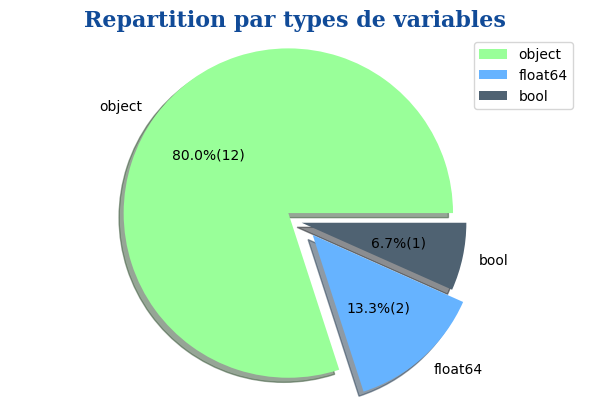

,Types de variables,Nombre
0,object,12
1,float64,2
2,bool,1


In [7]:
# Affichage des types de variables dans la base.
repartitionTypeVar(dfmarket,figsize=(6, 4))

In [8]:
dfmarket.dtypes #.value_counts()msno.matrix(dfmarket)

uniq_id                     object
crawl_timestamp             object
product_url                 object
product_name                object
product_category_tree       object
pid                         object
retail_price               float64
discounted_price           float64
image                       object
is_FK_Advantage_product       bool
description                 object
product_rating              object
overall_rating              object
brand                       object
product_specifications      object
dtype: object

In [9]:
fillingRate(dfmarket) # 'taux1.png'